# Exploratory Analysis of Water Quality Data I - Continuous Data

# Temporal Patterns

This document includes Python code and results of the exploratory analysis of water quality data in the SEACAR Pilot project.

In [21]:
import matplotlib.pyplot as plt
import numpy      as np
import pandas     as pd
import geopandas  as gpd
import contextily as cx
import seaborn as sns
import warnings
import math
import misc
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter,rrulewrapper, RRuleLocator, drange)
warnings.filterwarnings('ignore')

## 1. Data loading and preprocessing
Read and preprocess the water quality data.
- Select columns and managed areas
- Remove outliers
- Create lists/dictionaries of variables

In [22]:
# load shapefile of managed areas
areaShp = gpd.read_file("../GIS_data/ORCP_Managed_Areas_Oct2021.shp")
# Load and preprocess the WQ data
df2, listPara, listArea, listValue, dictUnits, dictMonth, dictArea = misc.load_data('../OEAT_Continuous-2022-Nov-04.csv')

## 2. Exploratory Analysis

Calculate each parameters' Count, Max, Min, Mean, and STD of each areas in weekly, monthly, quarterly and yearly intervals.

In [23]:
weekly_count     = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="W")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
monthly_count    = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="M")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
quarterly_count  = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="Q")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
yearly_count     = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="Y")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()

### 2.1 Weekly Count
Create line charts for sample **counts** in **weekly** intervals. The weekly results show that the number of samples fluctuate from week to week. Some areas have less than 5 data samples in some weeks. Spatial interpolation from the few samples may have high and fluctuating uncertainty. **Thus, spatial interpolation in weekly intervals is NOT practical**. 

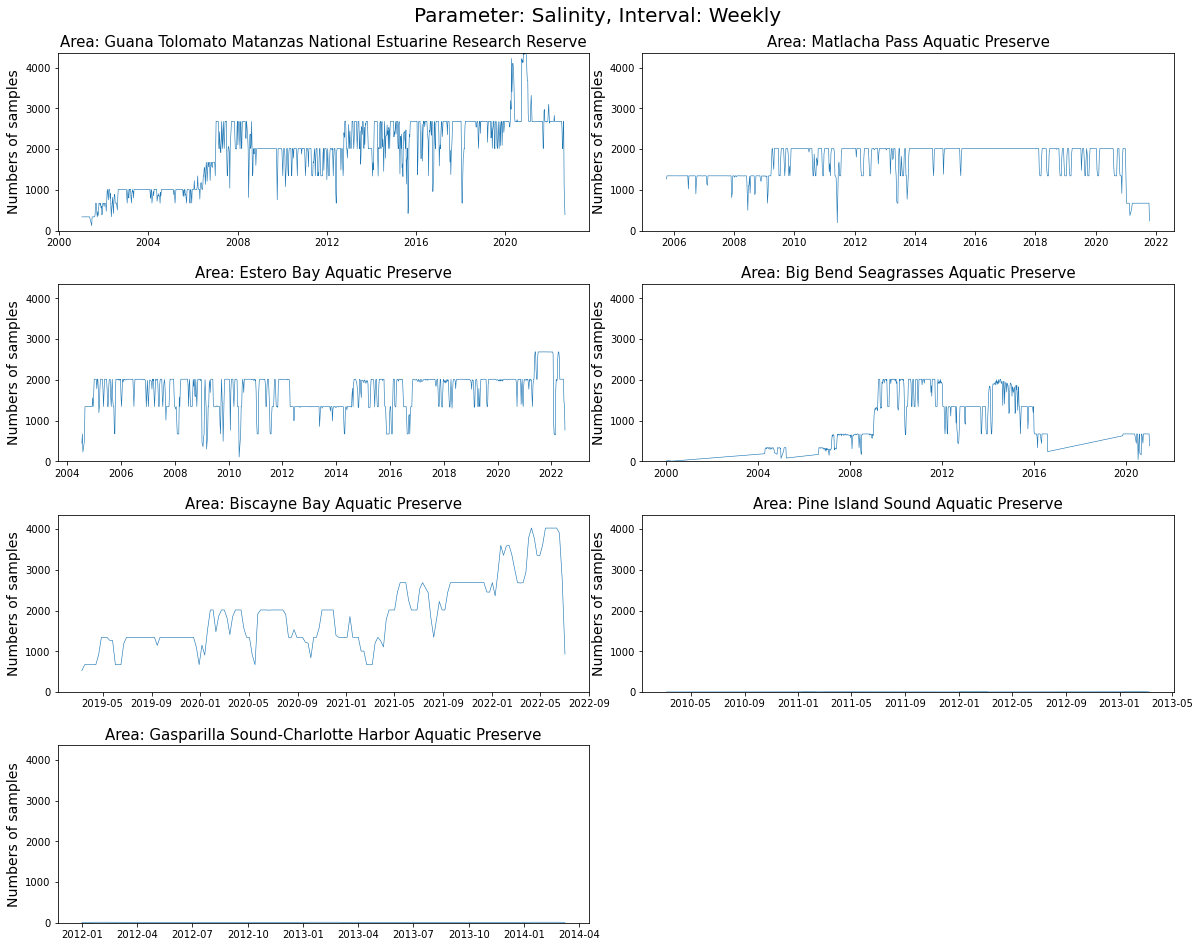

<Figure size 1440x1152 with 0 Axes>

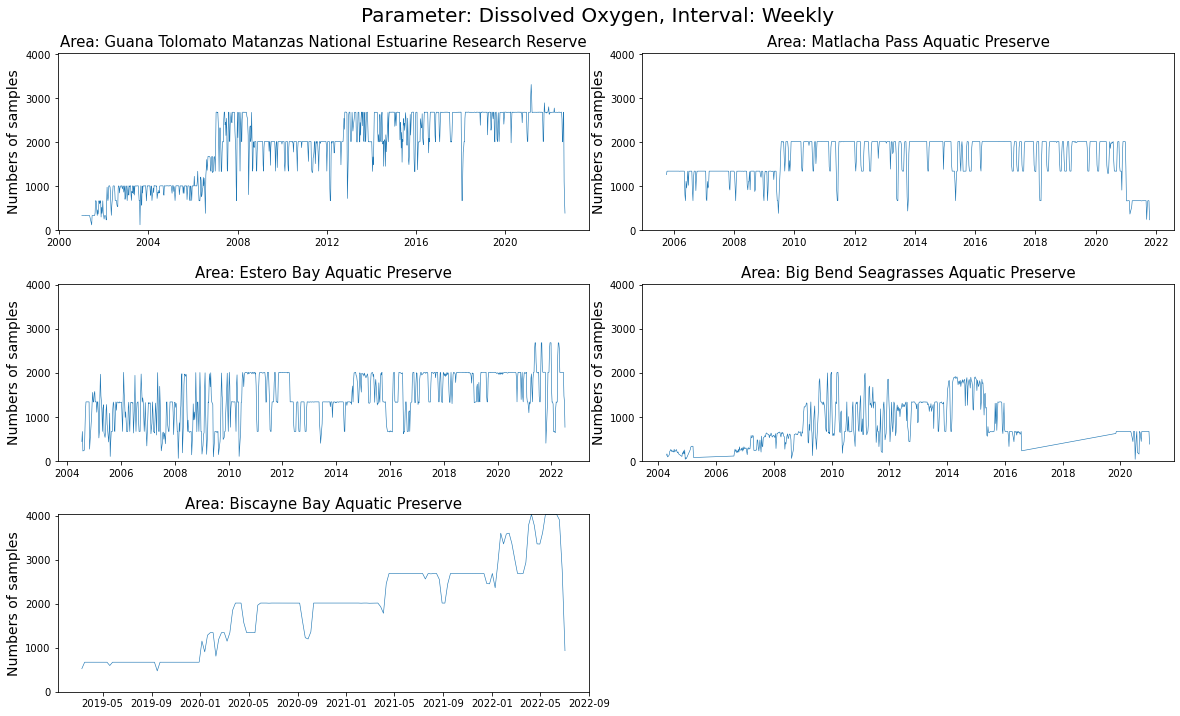

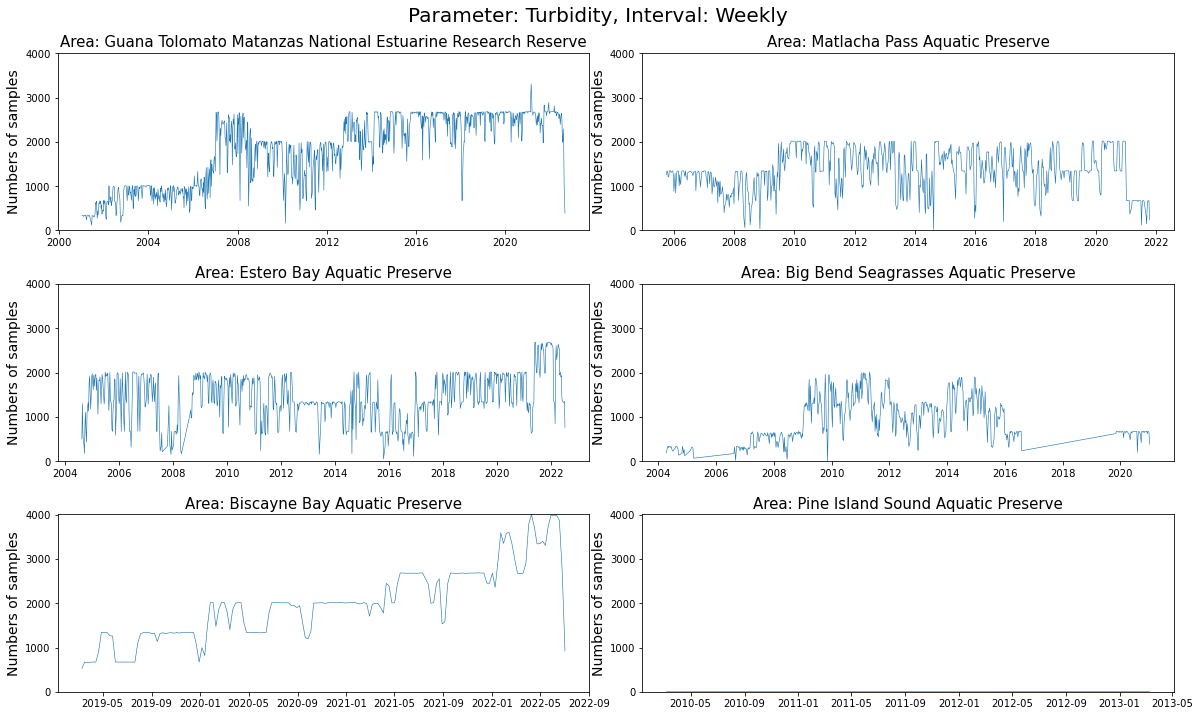

<Figure size 1440x1152 with 0 Axes>

In [24]:
plt.rcParams['figure.figsize'] = [20, 16]
#for value in listValue:
value = listValue[0]
r, c = math.ceil(len(listArea)/2),2 # rows and columns of subplots
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Interval: Weekly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    up_lim = weekly_count[(weekly_count["ParameterName"] == para)]['count'].max()
    for i in range(len(listArea)):
        dfNew = weekly_count[(weekly_count["ParameterName"] == para)&(weekly_count["ManagedAreaName"]== listArea[i])]
        if dfNew["ParameterName"].count() != 0:
            ax = fig.add_subplot(r,c,i+1)
            ax.set_title(str('Area: '+ listArea[i]),size=15) # title of subplots
            ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=0.6)
            ax.set_ylim([0,up_lim])
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
            plt.ylabel("Numbers of samples", size = 14) # Y Labels

### 2.2 Monthly Count

Create line charts for sample **counts** in monthly intervals. These line charts shows sampling activity in different time periods.

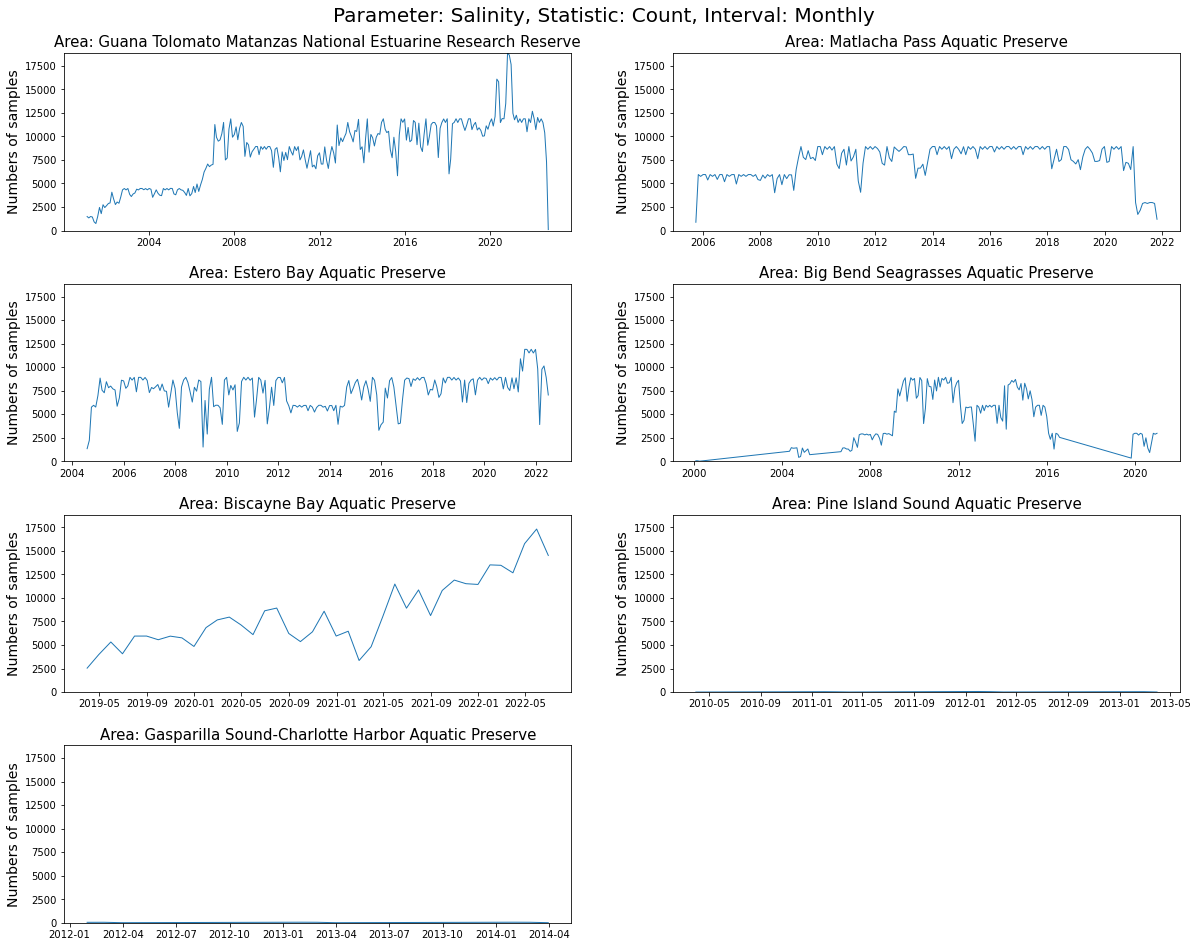

<Figure size 1440x1152 with 0 Axes>

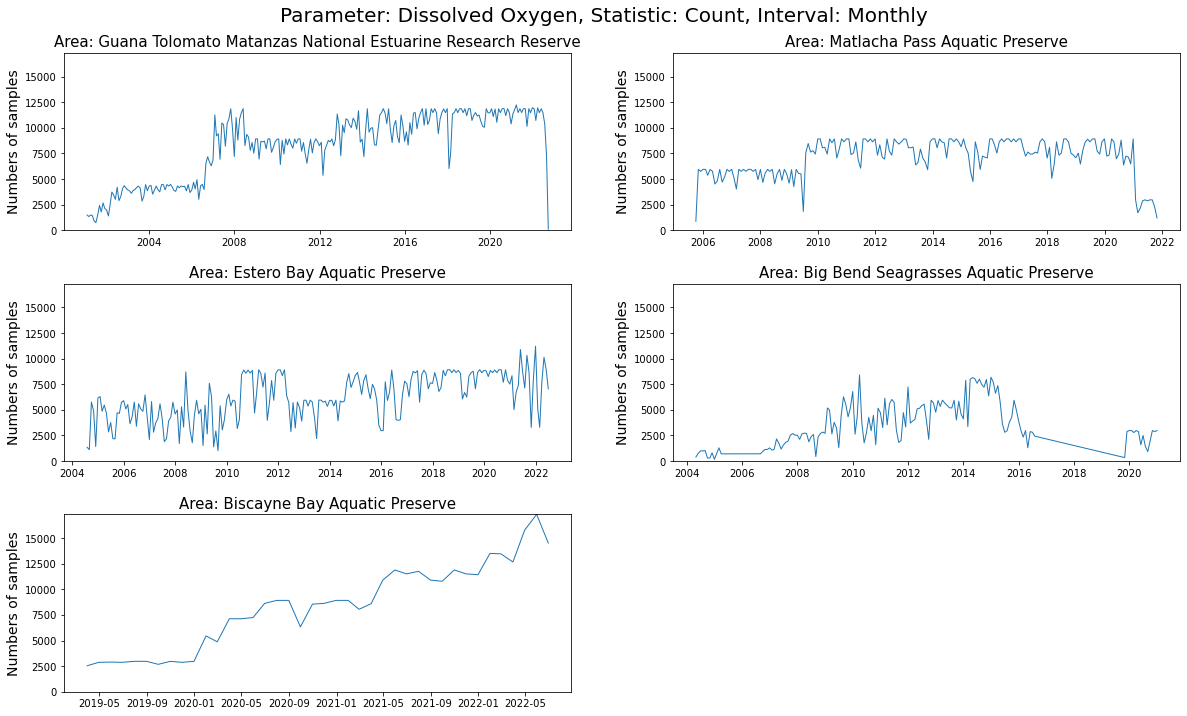

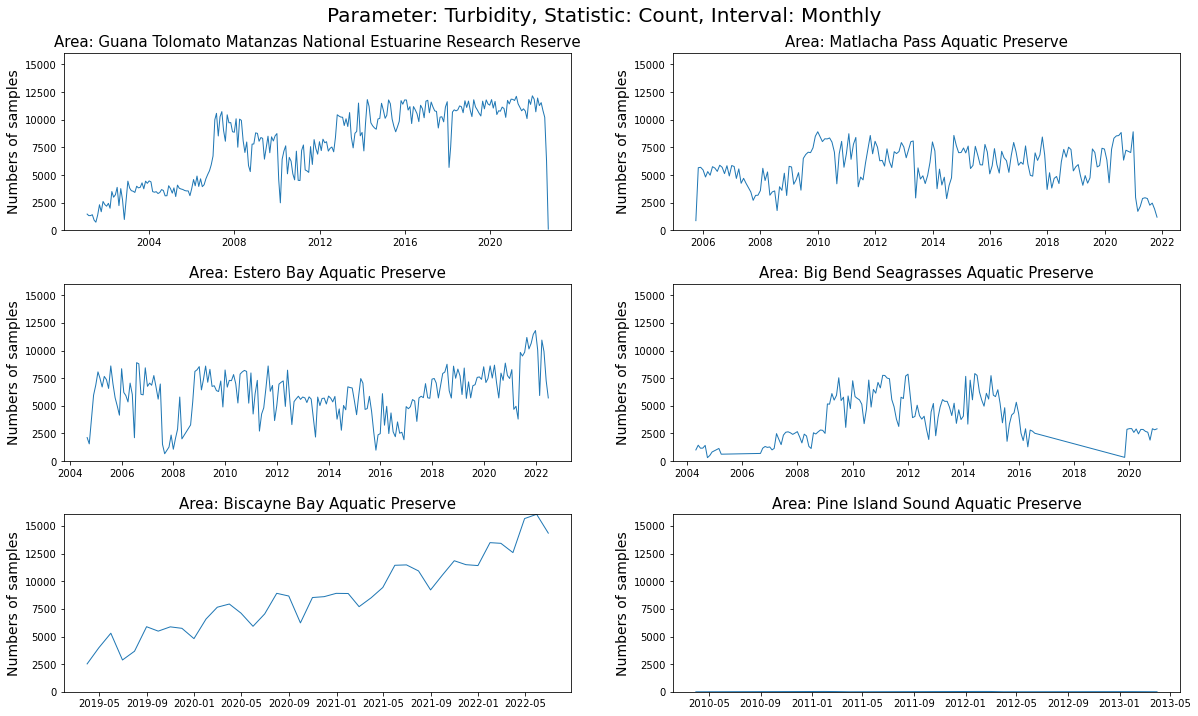

<Figure size 1440x1152 with 0 Axes>

In [29]:
plt.rcParams['figure.figsize'] = [20, 16]
#for value in listValue:
value = listValue[0]
r, c = math.ceil(len(listArea)/2),2 # rows and columns of subplots
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Statistic: " + value.capitalize() + ", Interval: Monthly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    up_lim = monthly_count[(monthly_count["ParameterName"] == para)]['count'].max()
    for i in range(len(listArea)):
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        if sum(dfNew[str(value)]) != 0:
            ax = fig.add_subplot(r,c,i+1)
            ax.set_title(str('Area: '+ listArea[i]),size=15) # title of subplots
            ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=1)
            ax.set_ylim([0,up_lim])
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
            plt.ylabel("Numbers of samples", size =14)

### 2.3 Monthly Error Bar

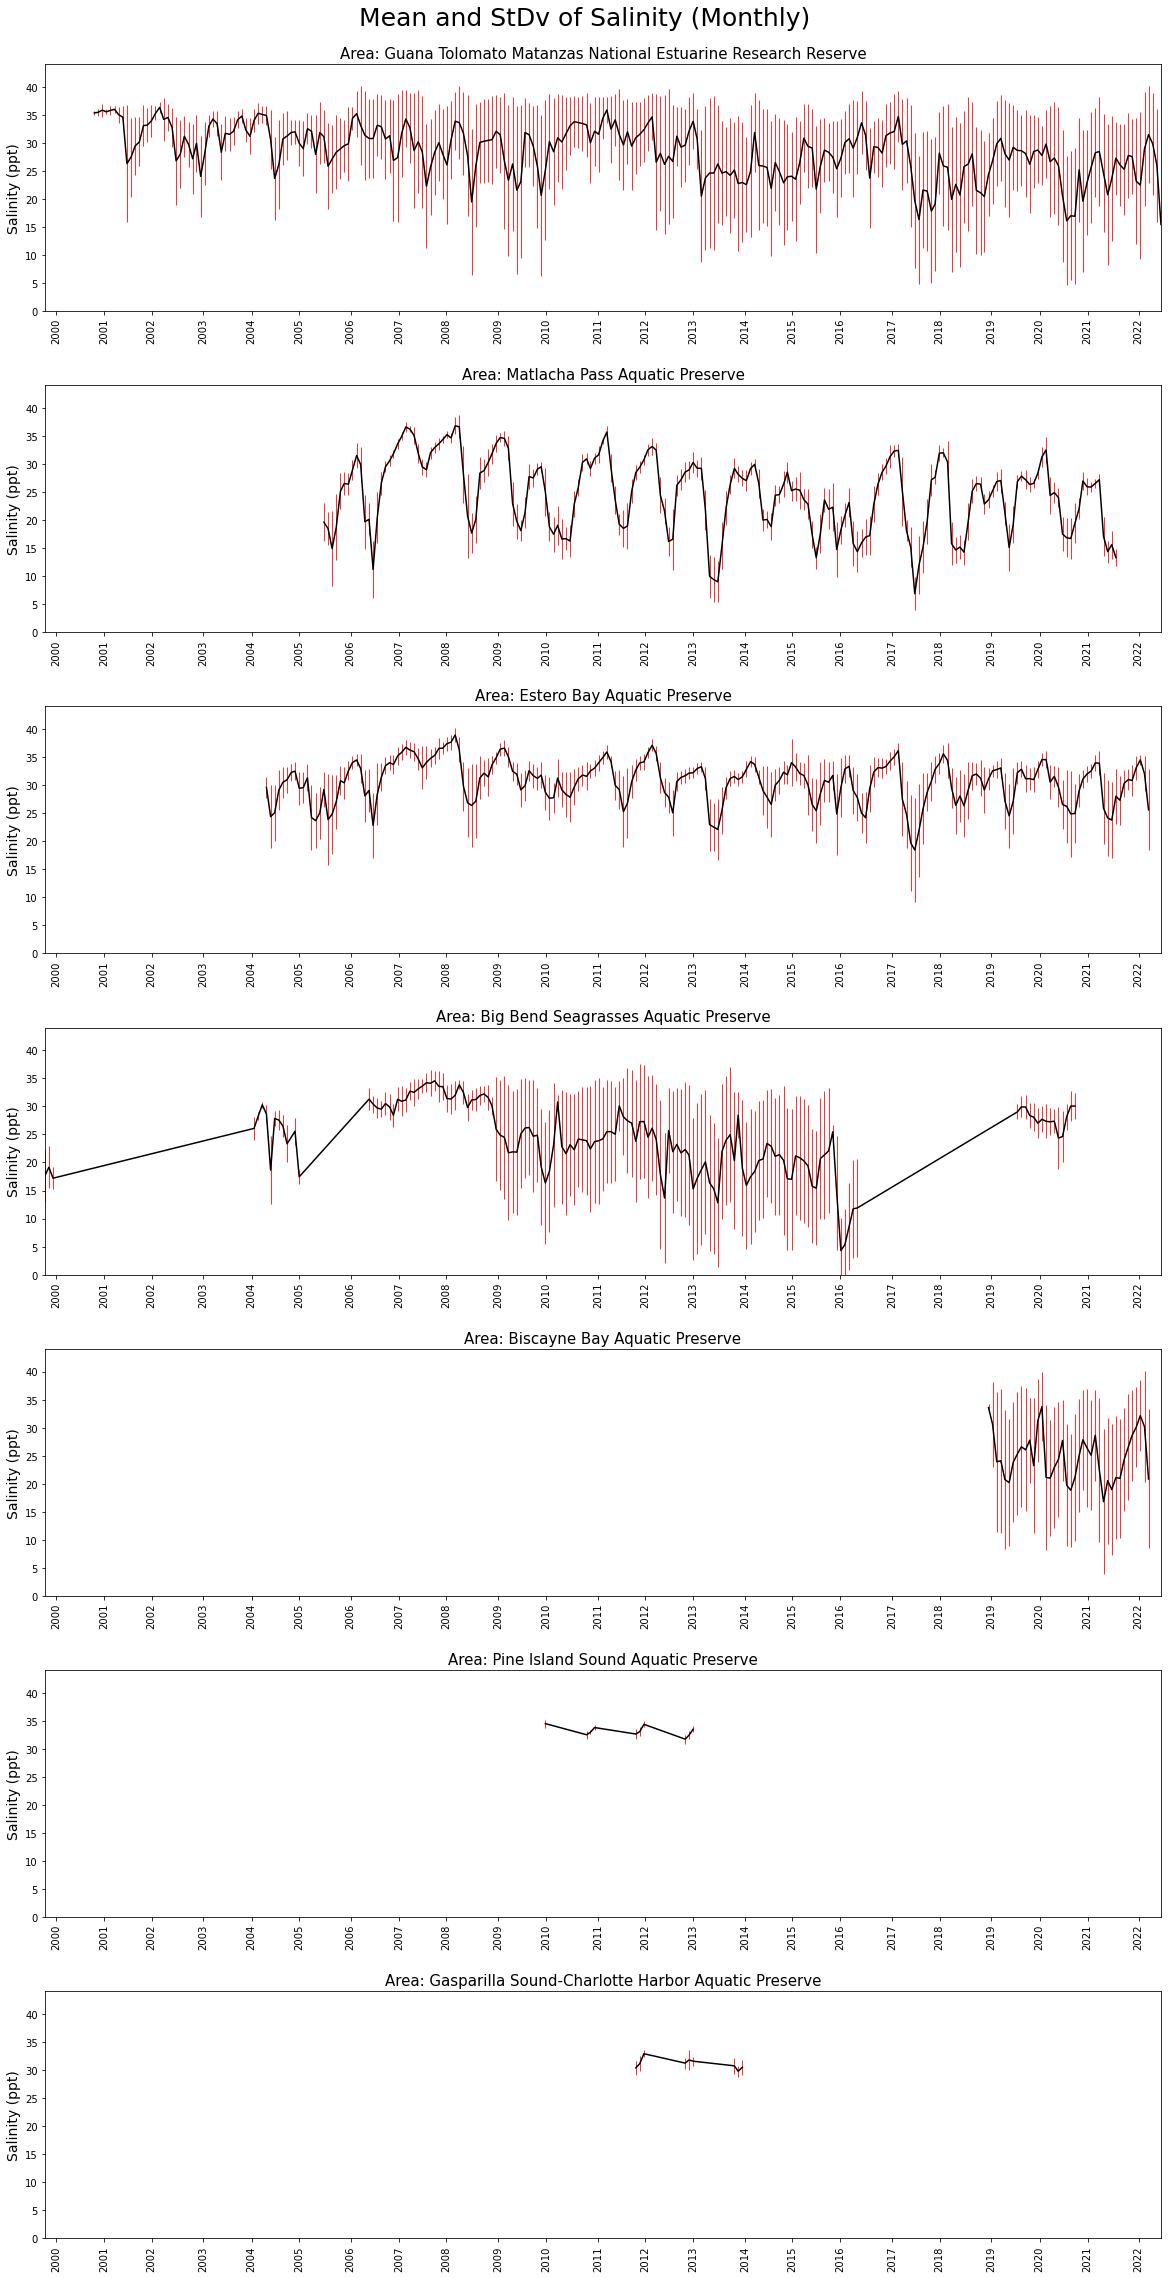

<Figure size 1440x2880 with 0 Axes>

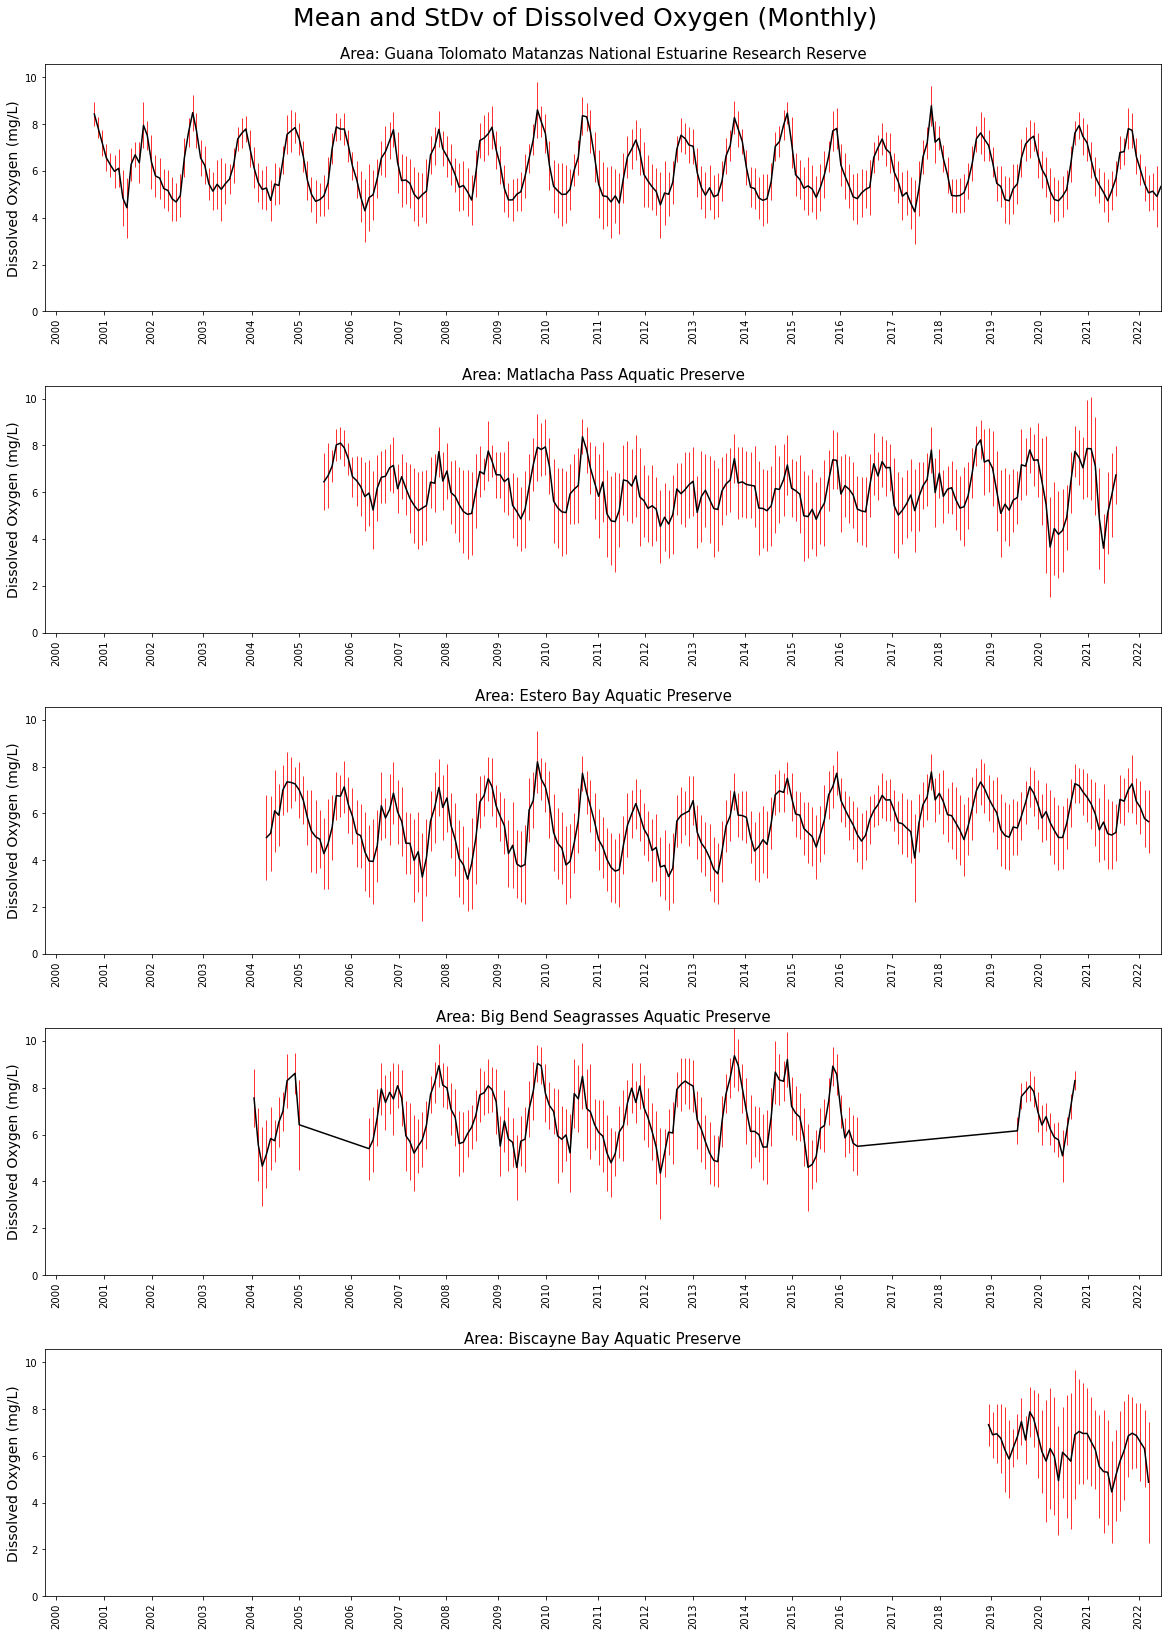

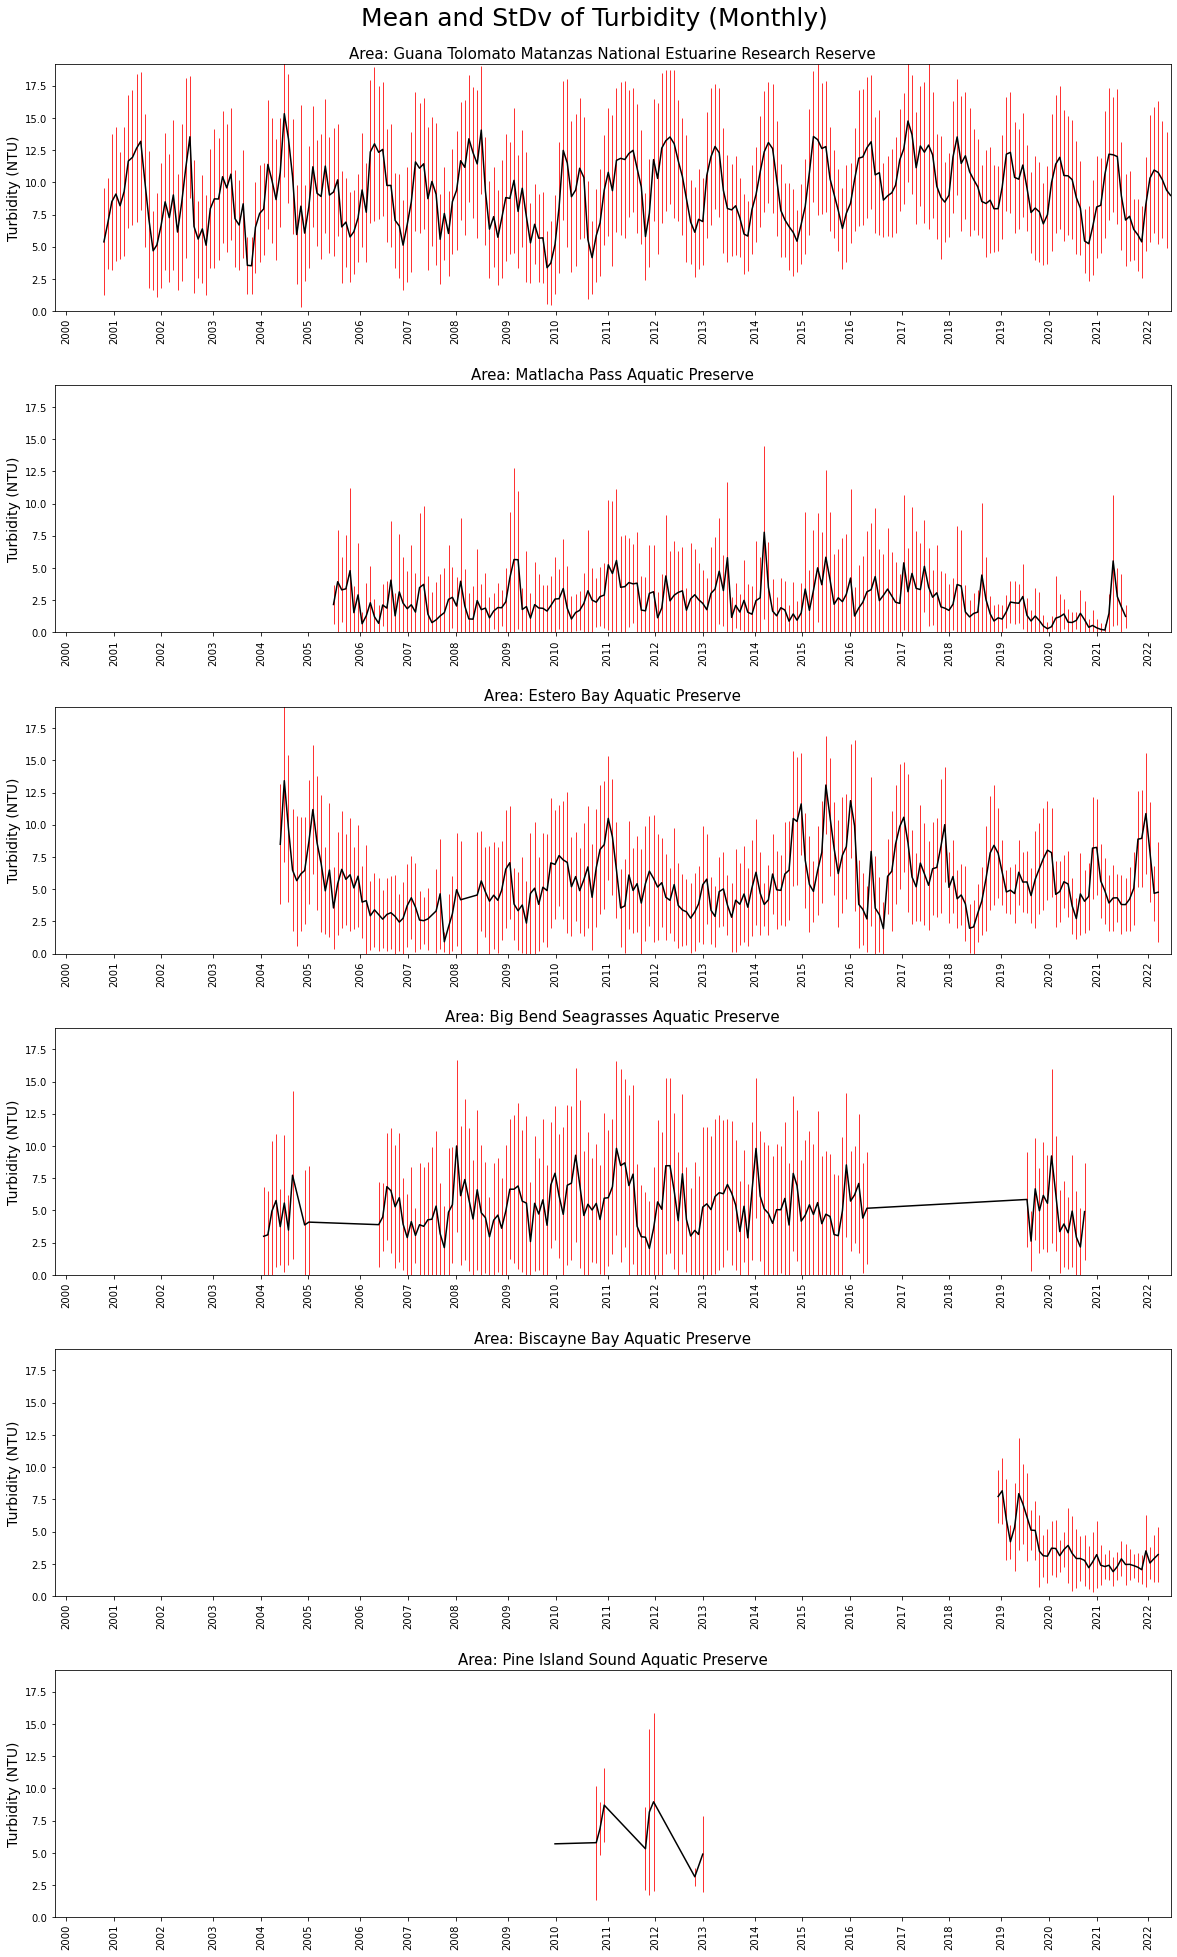

<Figure size 1440x2880 with 0 Axes>

In [30]:
import matplotlib.ticker as plticker

plt.rcParams['figure.figsize'] = [20, 40]
#for value in listValue:
value = listValue[1]

rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)

r, c = len(listArea),1 # rows and columns of subplots

for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Mean and StDv of {} (Monthly)".format(para), fontsize = 25, y = 0.9)
    # Calculate the upper limit of y axis
    stats = monthly_count[(monthly_count["ParameterName"] == para)]
    up_lim = stats['mean'].max()+stats['std'].mean()
    j = 0
    for i in range(len(listArea)):
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        if sum(dfNew[str(value)]) != 0:
            ax = fig.add_subplot(r,c,j+1)
            # Set title and font size
            ax.set_title('Area: '+ str(listArea[i]), size=15) # Title
            ax.errorbar(dfNew["timestamp"],dfNew['mean'],dfNew['std'],ecolor='red',elinewidth = 0.8,color="black")
            ax.xaxis.set_major_locator(loc)
            plt.xticks(rotation=90)
            # Set limit of x and y axis
            ax.set_ylim([0,up_lim])
            ax.set_xlim([monthly_count['timestamp'].min(),monthly_count['timestamp'].max()])
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
            plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.3)
            j = j+1

### 2.4 Yearly Error Bars

Black line is the mean and red lines are -1/+1 standard deviation.

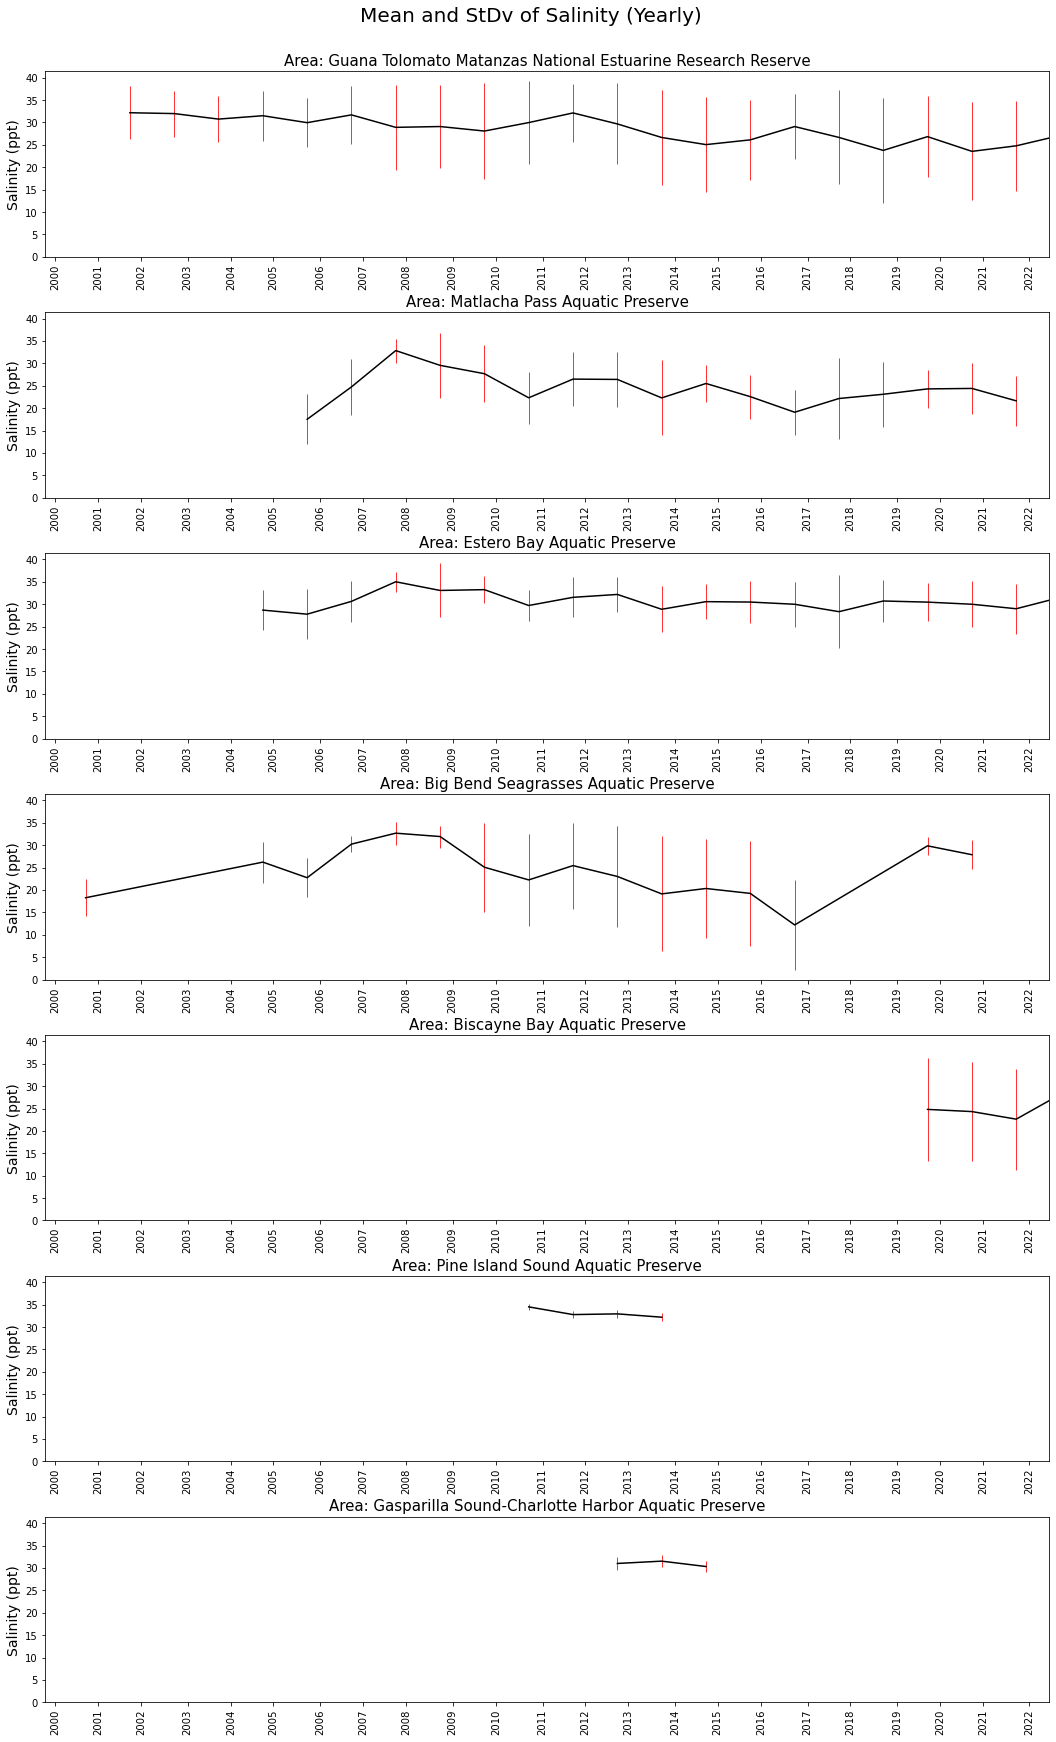

<Figure size 1296x2160 with 0 Axes>

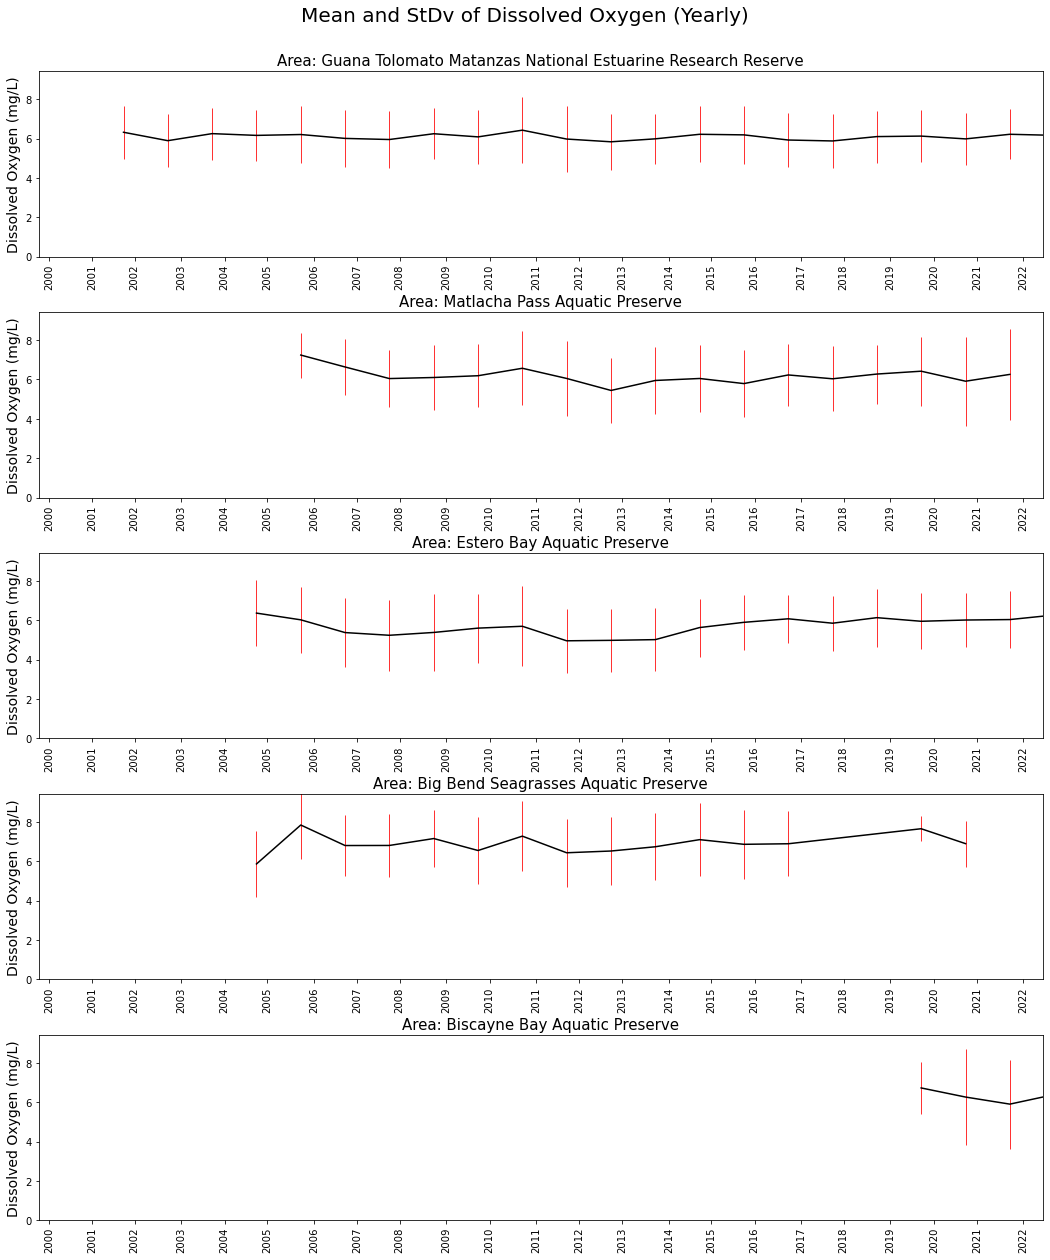

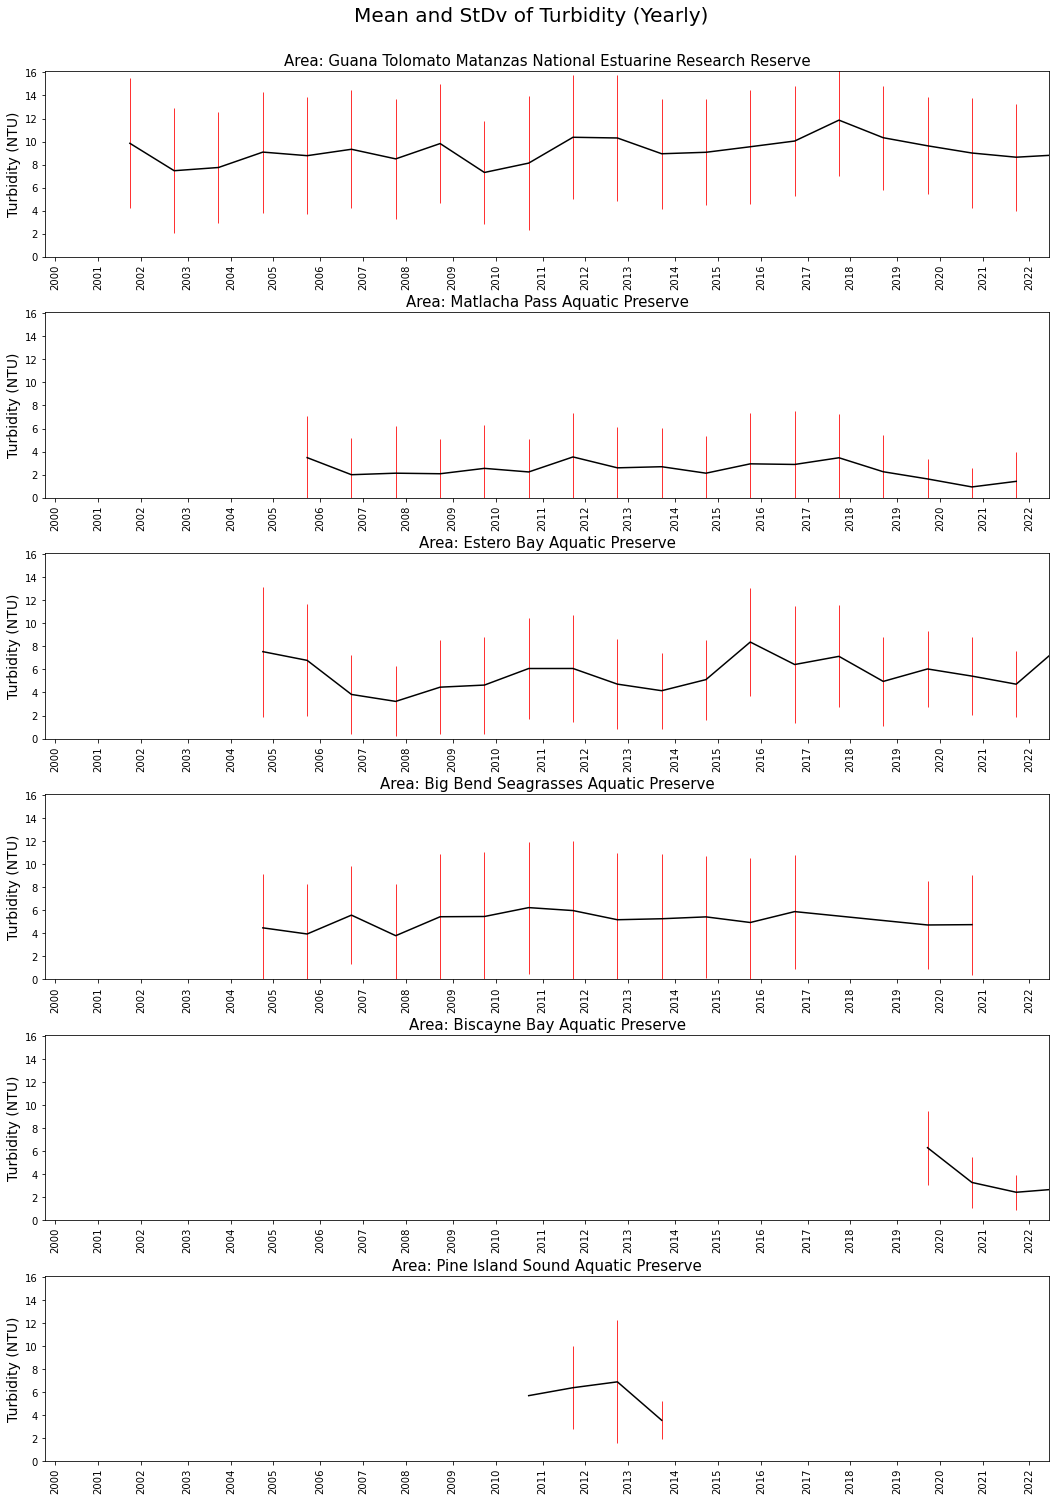

<Figure size 1296x2160 with 0 Axes>

In [31]:
plt.rcParams['figure.figsize'] = [18, 30]
#for value in listValue:
value = listValue[1]
r, c = len(listArea),1 # rows and columns of subplots

rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)

for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Mean and StDv of {} (Yearly)".format(para), fontsize = 20, y = 0.91)
    # Calculate the upper limit of y axis
    stats = yearly_count[(yearly_count["ParameterName"] == para)]
    up_lim = stats['mean'].max()+stats['std'].mean()
    j = 0
    for i in range(len(listArea)):
        dfNew = yearly_count[(yearly_count["ParameterName"] == para) & (yearly_count["ManagedAreaName"]== listArea[i])]
        if dfNew["ParameterName"].count() != 0:
            ax = fig.add_subplot(r,c,j+1)
            # Set title and font size
            ax.set_title('Area: '+ str(listArea[i]), size=15) # Title
            ax.errorbar(dfNew["timestamp"],dfNew['mean'],dfNew['std'],ecolor='red',elinewidth = 0.8,color="black")
            ax.xaxis.set_major_locator(loc)
            plt.xticks(rotation=90)
            
            # Set limit of x and y axis
            ax.set_ylim([0,up_lim])
            ax.set_xlim([monthly_count['timestamp'].min(),monthly_count["timestamp"].max()])
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
            plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.3)
            j = j+1

### 2.5 Statistics by Months

The following boxplots are statistics in the same months in different years. 

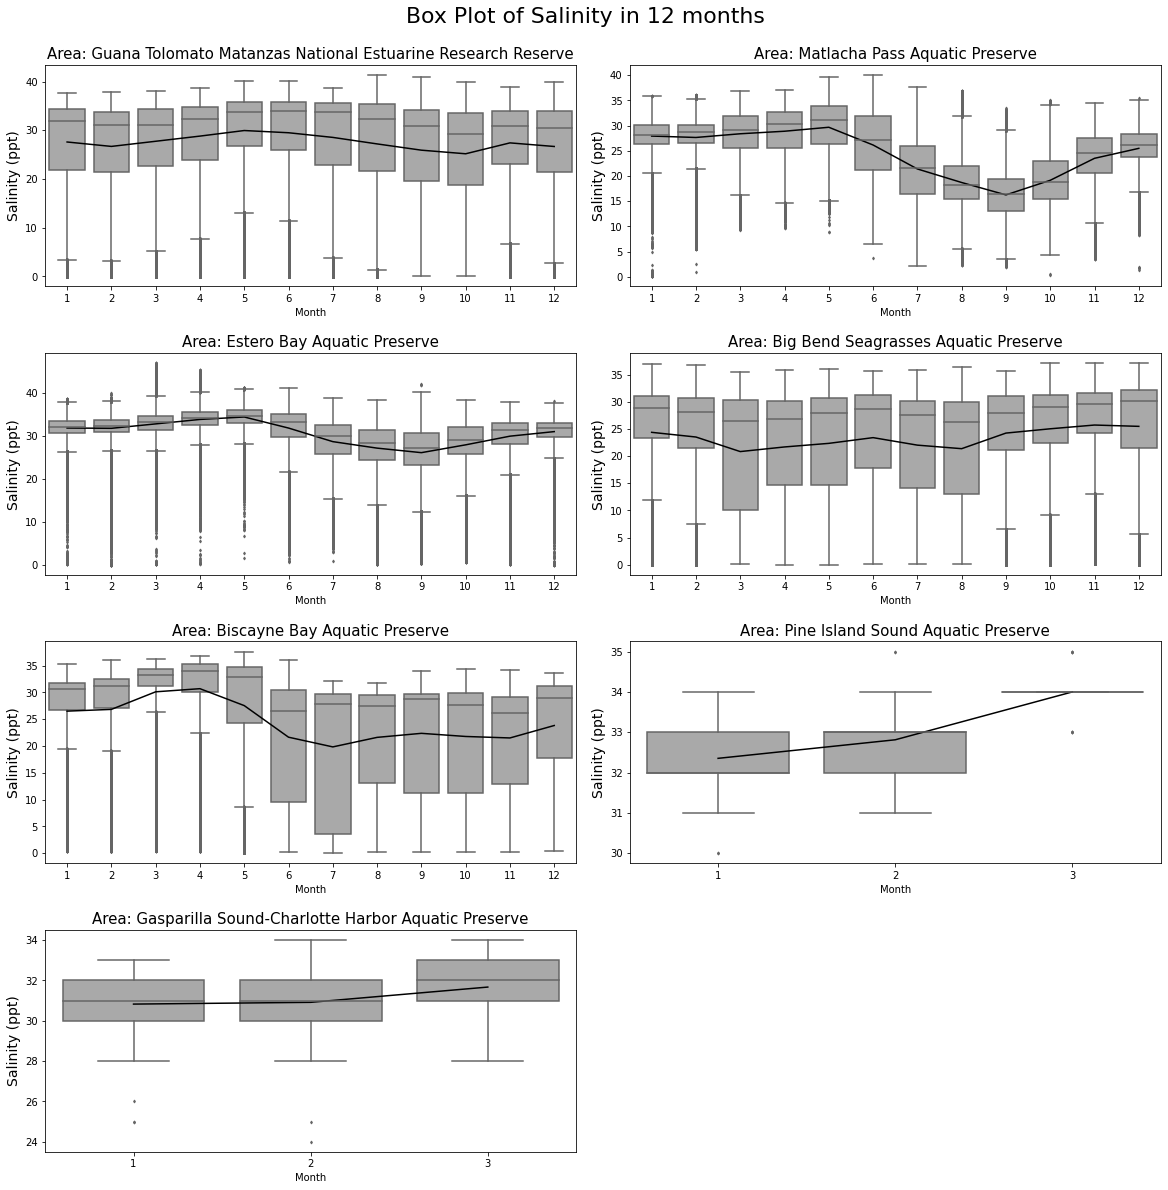

<Figure size 1440x1440 with 0 Axes>

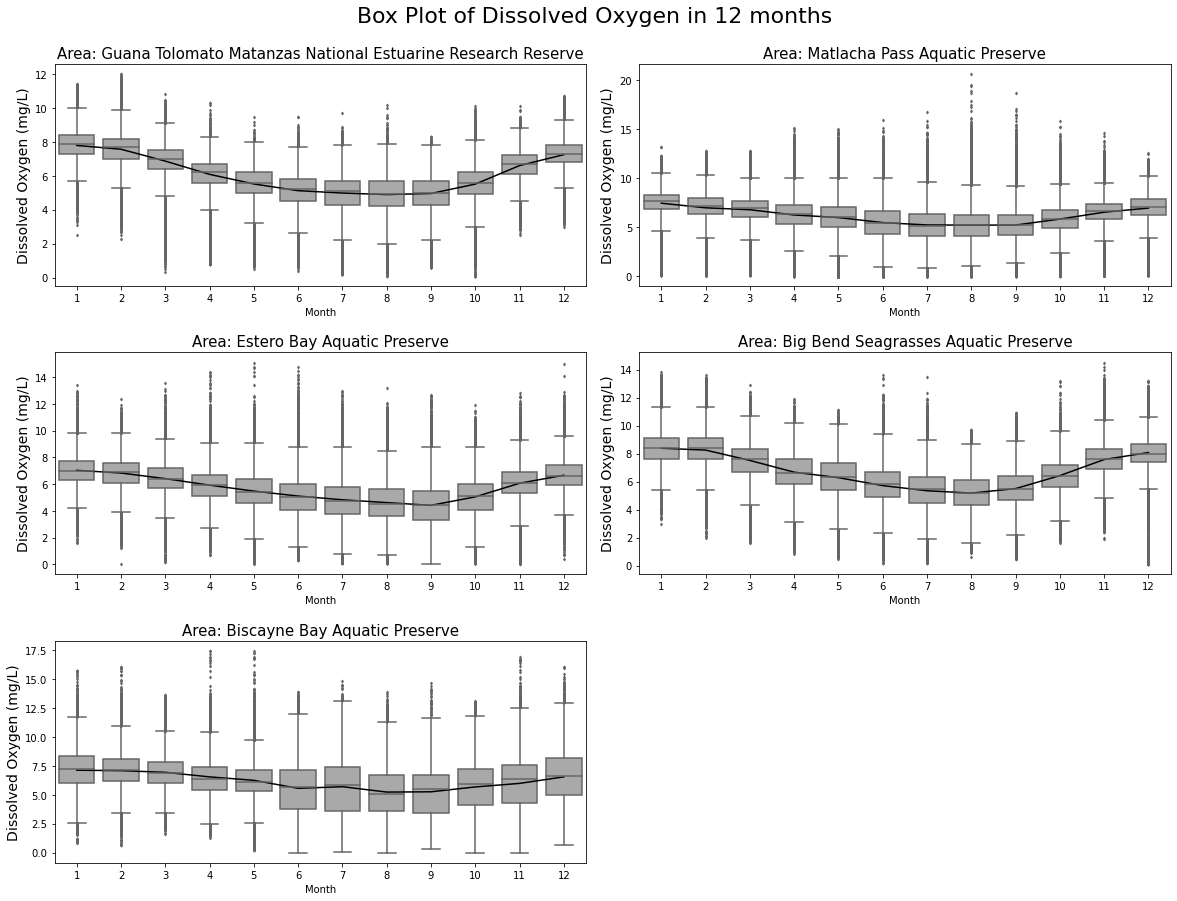

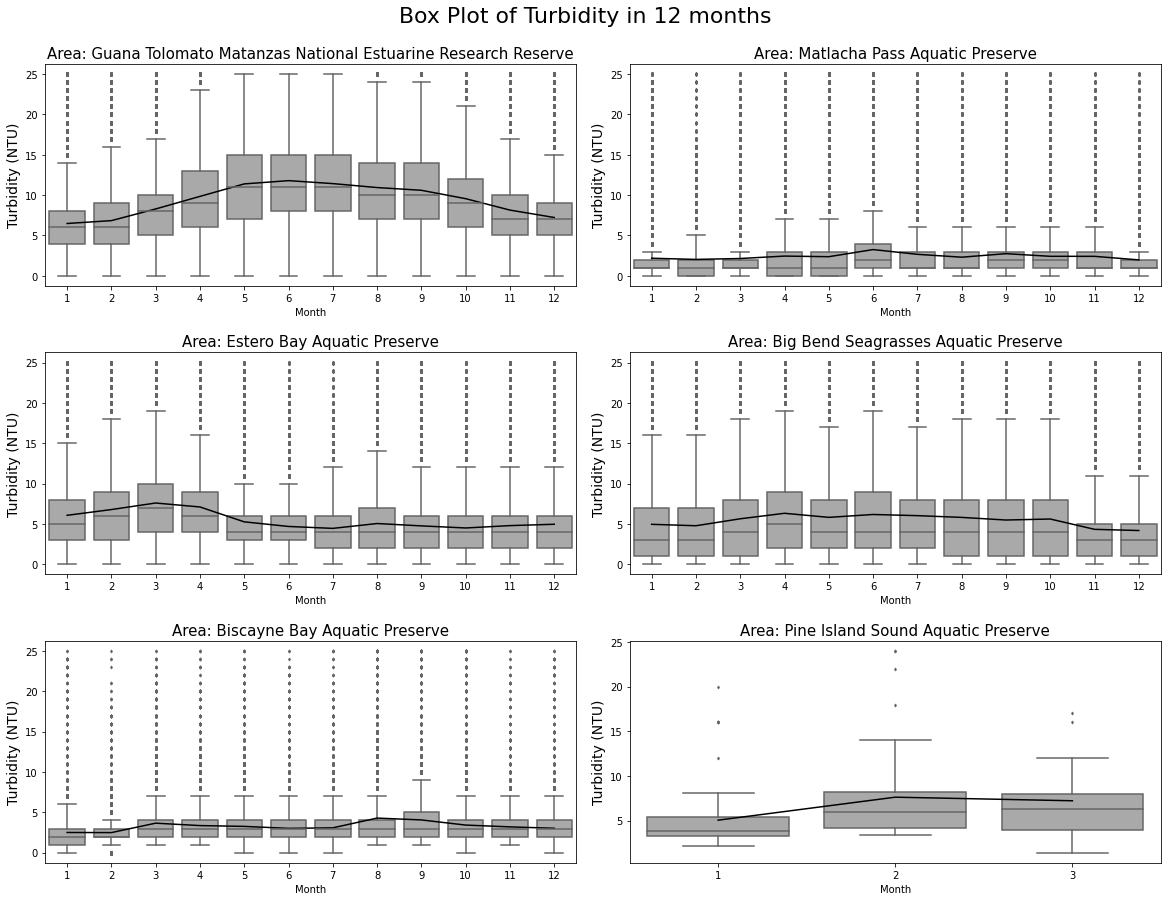

<Figure size 1440x1440 with 0 Axes>

In [32]:
plt.rcParams['figure.figsize'] = [20, 20]
# Group the data by each month
df3 = df2.groupby(["Month","ManagedAreaName","ParameterName"])["ResultValue"].agg([
    "count","max","min","mean","std"]).reset_index()
r, c = math.ceil(len(listArea)/2),2 # rows and columns of subplots
for para in listPara:
    fig = plt.figure()
    plt.suptitle("Box Plot of {} in 12 months".format(para), fontsize = 22, y = 0.92)
    i=0
    for area in listArea:
        df4 = df2[(df2["ManagedAreaName"]==area)&(df2["ParameterName"]==para)]
        df3_slct = df3[(df3["ManagedAreaName"]==area)&(df3["ParameterName"]==para)]
        if df3_slct["ParameterName"].count() != 0:
#         print(str(df3_slct["ParameterName"].count())+"     "+para)
            ax = fig.add_subplot(r,c,i+1)
            sns.boxplot(x=df4["Month"], y=df4["ResultValue"],orient='v',color='darkgray',fliersize=2, ax = ax)
            sns.lineplot(x=df3_slct["Month"]-1, y=df3_slct["mean"],color='black',ax=ax)
            ax.set_title("Area: {}".format(area), size=15) # Title
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
            plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)        
            i = i + 1